## **Installing and Importing Modules**

In [1]:
!pip install face_recognition

In [2]:
import face_recognition as fr
from time import sleep
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
import dlib
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
from scipy.spatial import distance
%matplotlib inline

# Face Detecton and Recognition

In [3]:
def get_encoded_faces():
   
    encoded = {}

    for dirpath, dnames, fnames in os.walk("/content/drive/My Drive/Face Recog/faces"):
        for f in fnames:
            if f.endswith(".jpg") or f.endswith(".png") or f.endswith(".jpeg"):
                face = fr.load_image_file("/content/drive/My Drive/Face Recog/faces/" + f)
                encoding = fr.face_encodings(face)[0]
                encoded[f.split(".")[0]] = encoding

    return encoded


def unknown_image_encoded(img):
    
    face = fr.load_image_file("/content/drive/My Drive/Face Recog/faces/" + img)
    encoding = fr.face_encodings(face)[0]

    return encoding


def classify_face(im):
    
    faces = get_encoded_faces()
    faces_encoded = list(faces.values())
    known_face_names = list(faces.keys())

    img = cv2.imread(im, 1)
    #img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    #img = img[:,:,::-1]
 
    face_locations = fr.face_locations(img)
    unknown_face_encodings = fr.face_encodings(img, face_locations)

    face_names = []
    for face_encoding in unknown_face_encodings:
        # See if the face is a match for the known face(s)
        matches = fr.compare_faces(faces_encoded, face_encoding)
        name = "Unknown"

        # use the known face with the smallest distance to the new face
        face_distances = fr.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Draw a box around the face
            cv2.rectangle(img, (left-20, top-20), (right+20, bottom+20), (255, 0, 0), 2)

            # Draws a label with a name below the face
            cv2.rectangle(img, (left-20, bottom -15), (right+20, bottom+20), (255, 0, 0), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(img, name, (left -20, bottom + 15), font, 0.8, (255, 255, 255), 2)


    # Display the resulting image
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))
    plt.imshow(img)
    ax = plt.gca()
    plt.show()

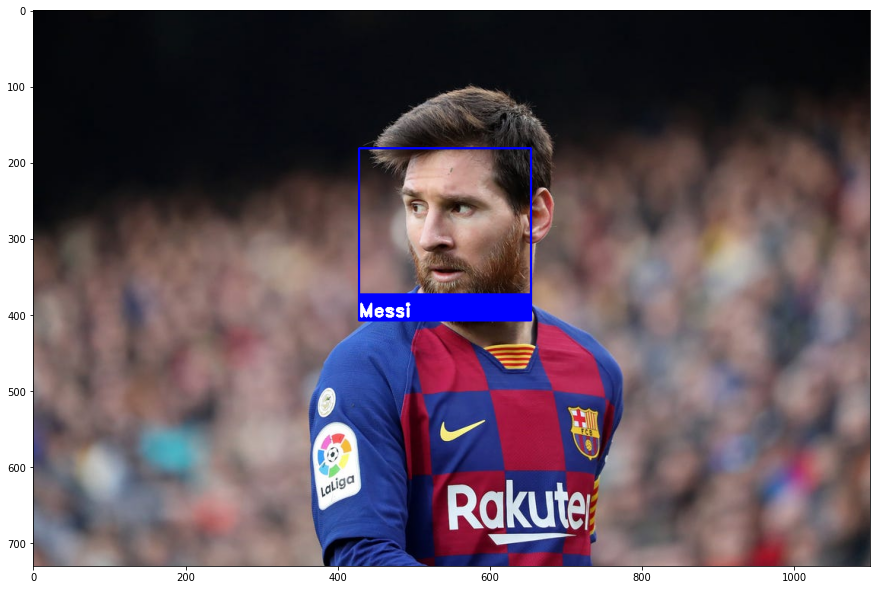

In [4]:
classify_face('/content/drive/My Drive/Face Recog/faces/Messi.jpg')

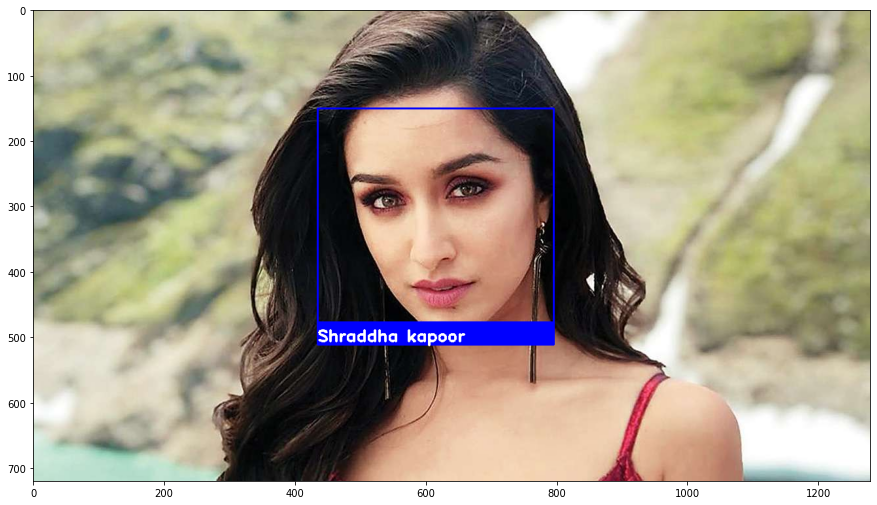

In [5]:
classify_face('/content/drive/My Drive/Face Recog/faces/Shraddha kapoor.jpg')

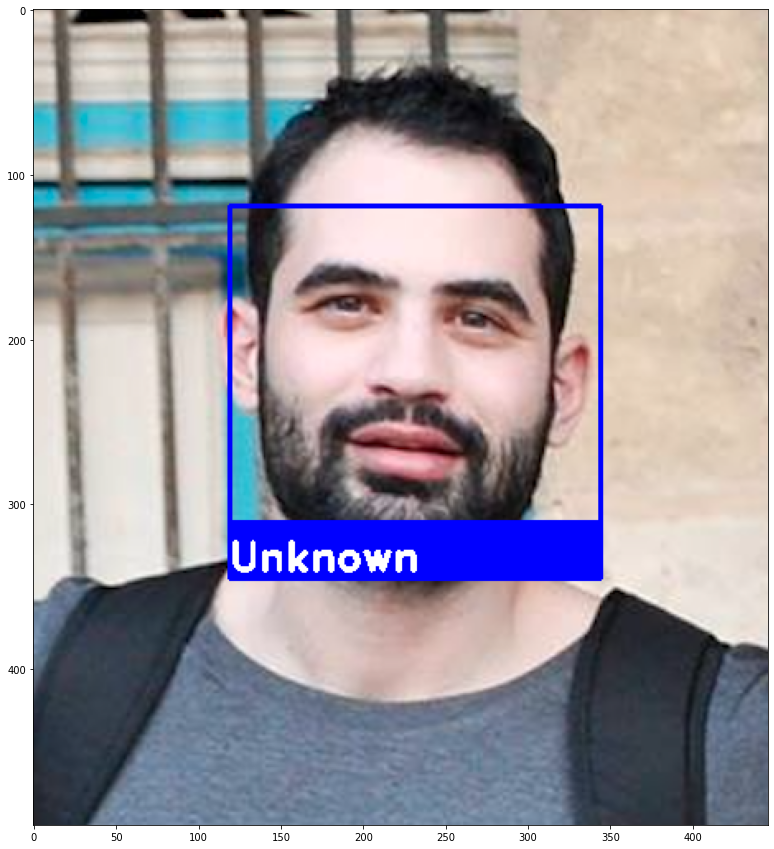

In [6]:
classify_face('/content/drive/My Drive/Face Recog/test images/RANDOM1.jpg')

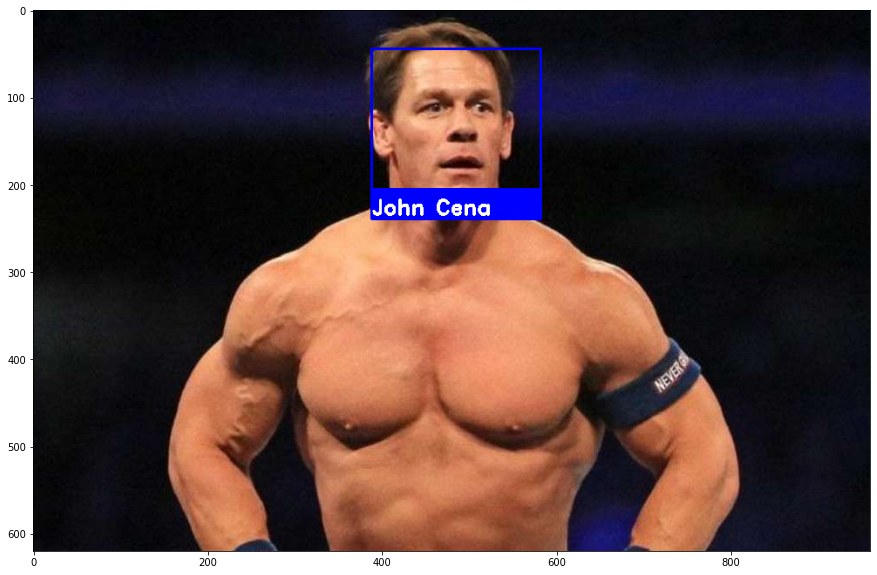

In [7]:
classify_face('/content/drive/My Drive/Face Recog/faces/John Cena.jpg')

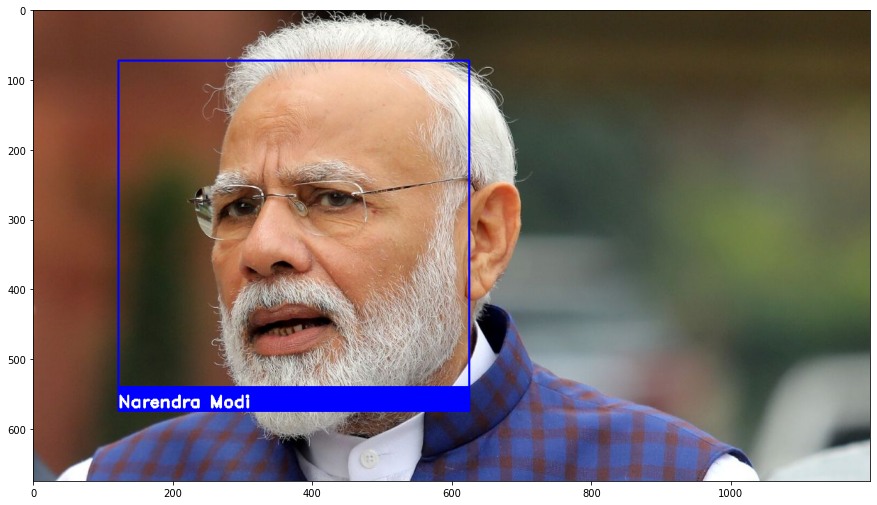

In [8]:
classify_face('/content/drive/My Drive/Face Recog/faces/Narendra Modi.jpg')

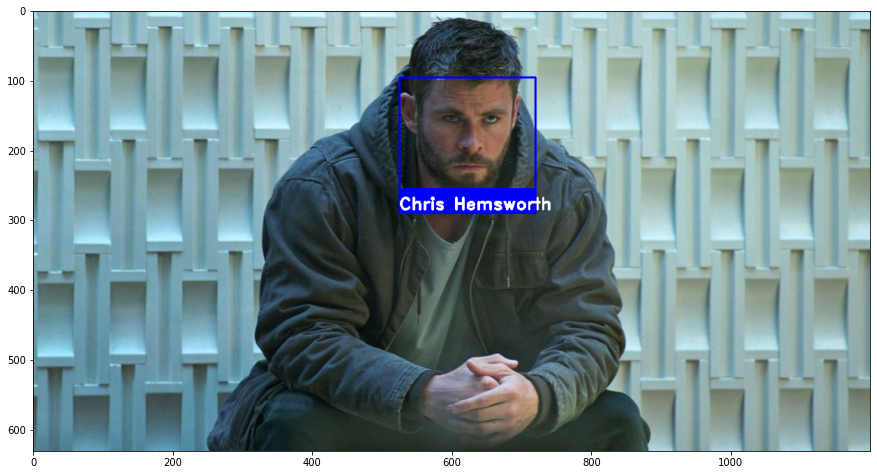

In [9]:
classify_face('/content/drive/My Drive/Face Recog/faces/Chris Hemsworth.jpg')

# Detecting Facial Keypoints

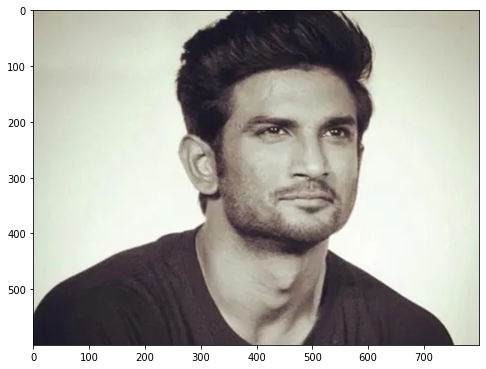

In [10]:
a = cv2.imread('/content/drive/My Drive/Face Recog/faces/Sushant Singh.jpg')
image = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(image)

# Download shape_predictor_68_face_landmarks.dat(https://drive.google.com/file/d/1wkL5jVn3pVvbxiq31oEA81ODSe6RzZdT/view?usp=sharing)

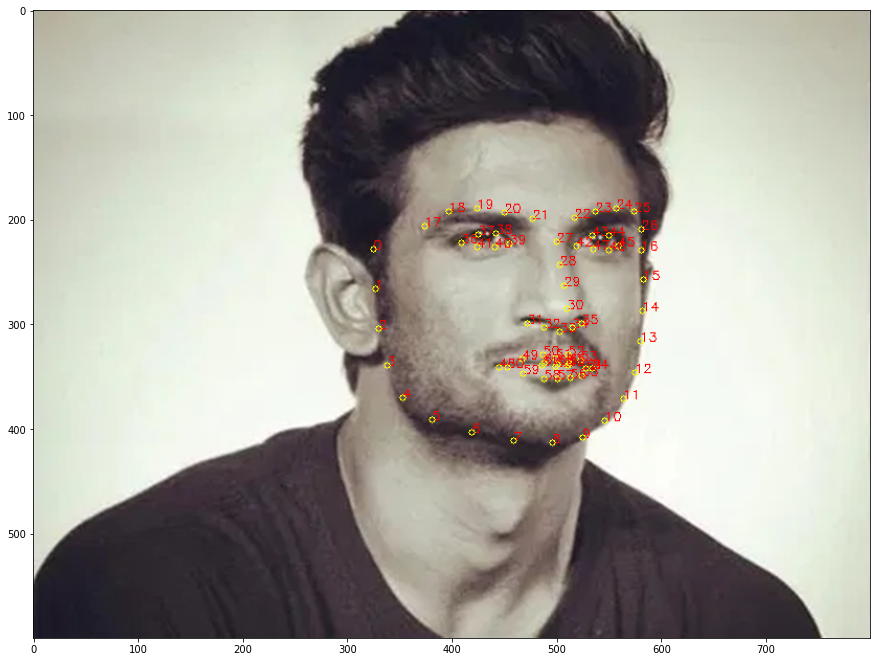

In [11]:
PREDICTOR_PATH = "/content/drive/My Drive/Face Recog/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()


class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces

    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

image = cv2.imread('/content/drive/My Drive/Face Recog/faces/Sushant Singh.jpg')
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
image_with_landmarks = cv2.cvtColor(image_with_landmarks,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(image_with_landmarks)
ax = plt.gca()

# Face Detection

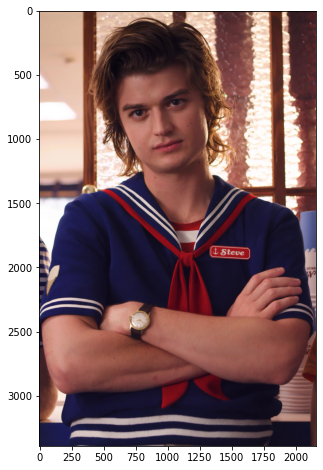

In [12]:

a = cv2.imread('/content/drive/My Drive/Face Recog/faces/steve.jpg')
image = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(image)

In [13]:
face_locations = fr.face_locations(image)
number = len(face_locations)
print("Found {} face(s) in the input image.".format(number))

Found 1 face(s) in the input image.


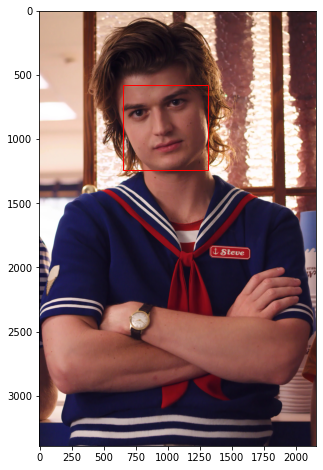

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom

  rect = Rectangle((x,y),w-x,h-y,fill= False, color = "red")
  ax.add_patch(rect)
plt.show()

# Recognizing Person In The Image

In [15]:
a= cv2.imread('/content/drive/My Drive/Face Recog/faces/steve.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
b= cv2.imread('/content/drive/My Drive/Face Recog/faces/Emma Watson.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
c= cv2.imread('/content/drive/My Drive/Face Recog/faces/harry.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
d= cv2.imread('/content/drive/My Drive/Face Recog/faces/obama.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [16]:
a_encoding = fr.face_encodings(a)[0]
b_encoding = fr.face_encodings(b)[0]
c_encoding = fr.face_encodings(c)[0]
d_encoding = fr.face_encodings(d)[0]

known_face_encodings = [
    a_encoding,
    b_encoding,
    c_encoding,
    d_encoding
]

Found Barrack Obama in the photo!


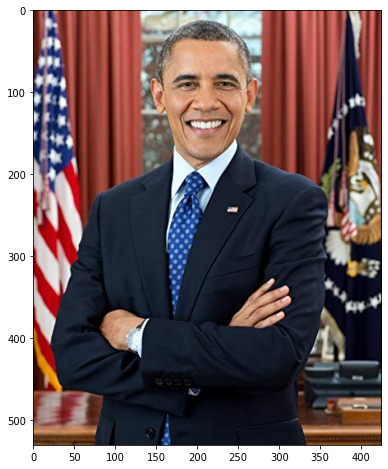

In [17]:
image = cv2.imread('/content/drive/My Drive/Face Recog/faces/obama.jpg')
unknown_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(unknown_image)
unknown_face_encodings = fr.face_encodings(unknown_image)
for unknown_face_encoding in unknown_face_encodings:
    results = []
    for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding,unknown_face_encoding)
        results.append(d)
    threshold = 0.6
    results = np.array(results)<=threshold
    
    name = "Unknown"
    if results[0]:
        name = "Steve"
    elif results[1]:
        name = "Emma Watson"
    elif results[2]:
        name = "Harry potter"
    elif results[3]:
        name = "Barrack Obama"
        
    print(f"Found {name} in the photo!")

# Playing With The Images

In [18]:
image = cv2.imread('/content/drive/My Drive/Face Recog/faces/Shraddha kapoor.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [19]:
face_landmarks_list = fr.face_landmarks(image)

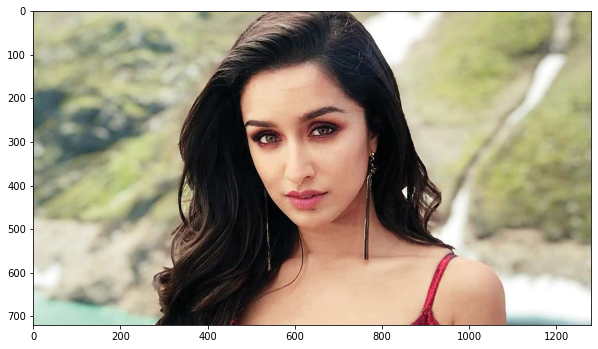

In [20]:
plt.figure(figsize=(10,10))  
plt.imshow(image)

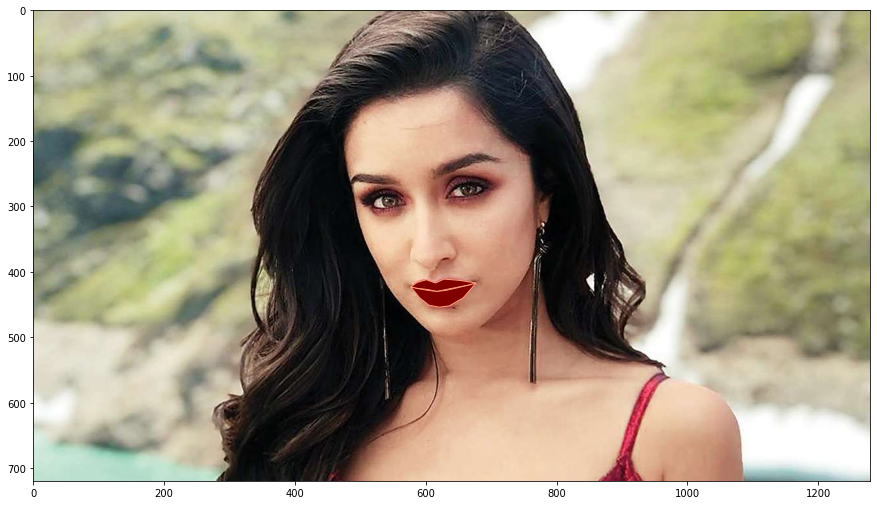

In [21]:
plt.figure(figsize=(15,15))  
plt.imshow(image)
ax = plt.gca()
for face_landmarks in face_landmarks_list:
  for face_landmarks in face_landmarks_list:
    p = Polygon(face_landmarks['top_lip'], facecolor = 'maroon', edgecolor = 'lightsalmon')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'], facecolor = 'maroon', edgecolor = 'lightsalmon')
    ax.add_patch(p)   
plt.show()

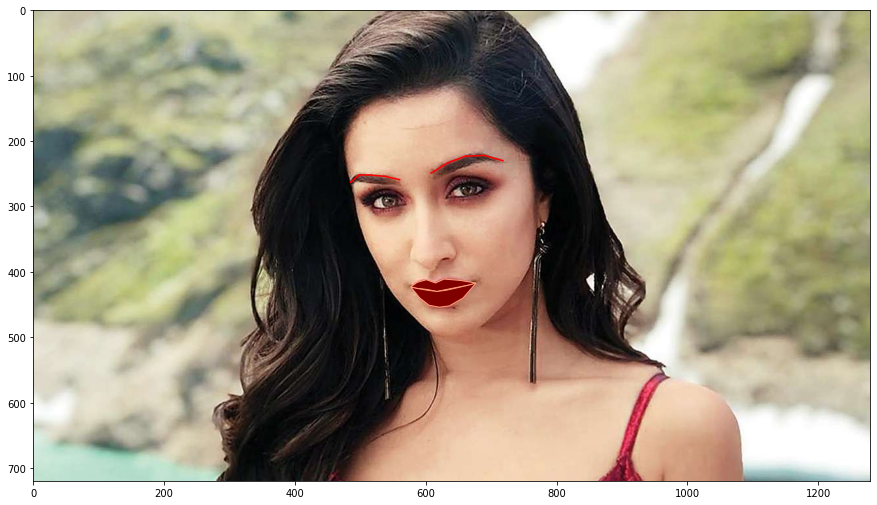

In [22]:
plt.figure(figsize=(15,15))  
plt.imshow(image)
ax = plt.gca()
for face_landmarks in face_landmarks_list:

    left_eyebrow_pts = face_landmarks['left_eyebrow']
    pre_x,pre_y = left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
        l = mlines.Line2D([pre_x,x],[pre_y,y],color = "red")
        ax.add_line(l)
        pre_x,pre_y = x,y
        
    right_eyebrow_pts = face_landmarks['right_eyebrow']
    pre_x,pre_y = right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
        l = mlines.Line2D([pre_x,x],[pre_y,y],color = "red")
        ax.add_line(l)
        pre_x,pre_y = x,y
    for face_landmarks in face_landmarks_list:
      p = Polygon(face_landmarks['top_lip'], facecolor = 'maroon', edgecolor = 'lightsalmon')
      ax.add_patch(p)
      p = Polygon(face_landmarks['bottom_lip'], facecolor = 'maroon', edgecolor = 'lightsalmon')
      ax.add_patch(p)       
plt.show()